In [1]:
import os 
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.font_manager as font_manager

In [2]:
# llava1.5
# tokens = ['▁A', '▁woman', '▁writing', '▁a', '▁letter', '▁with', '▁a', '▁red', '▁pen']
# greedy_base_logits = [17.890625, 17.28125, 15.9140625, 19.234375, 18.78125, 18.765625, 20.15625, 14.828125, 14.984375]
# greedy_noise_logits = [14.578125, 6.97265625, 5.32421875, 16.578125, 15.2734375, 15.8984375, 14.09375, 9.6640625, 12.8671875]
# delta_logits_topk_mean_list = [8.875, 8.7265625, 8.609375, 3.10546875, 4.3359375, 4.27734375, 7.49609375, 4.45703125, 6.5859375]

# tokens = ['▁A', '▁woman', '▁writing', '▁a', '▁letter', '▁with', '▁a', '▁red', '▁fe', 'ather', '▁pen']
# greedy_base_logits = [17.734375, 17.1875, 15.78125, 19.265625, 18.75, 18.75, 20.140625, 14.734375, 15.078125, 23.125, 16.546875]
# greedy_noise_logits = [14.734375, 5.4296875, 4.8984375, 16.40625, 15.2109375, 15.1328125, 13.7421875, 9.59375, 7.296875, 20.375, 16.09375]
# # delta_logits_topk_mean_list = [9.578125, 9.78125, 8.984375, 3.396484375, 4.140625, 5.08203125, 7.91015625, 4.69140625, 6.63671875, 1.951171875, 3.337890625]
# # jsd_list = [9.059906005859375e-06, 7.426738739013672e-05, 3.254413604736328e-05, 1.6689300537109375e-06, 1.2159347534179688e-05, 7.748603820800781e-06, 6.318092346191406e-06, 2.664327621459961e-05, 2.1338462829589844e-05, 1.1920928955078125e-07, 3.516674041748047e-06]
# jsd_topk_list = [0.0030307769775390625, 0.045806884765625, 0.0199737548828125, 0.0006628036499023438, 0.006580352783203125, 0.004611968994140625, 0.0023365020751953125, 0.009124755859375, 0.00893402099609375, 6.0498714447021484e-05, 0.00213623046875]

# tokens = ['▁A', '▁baby', '▁we', 'aring', '▁a', '▁yellow', '▁and', '▁white', '▁hat', '▁is', '▁holding', '▁a', '▁red', '▁l', 'ol', 'lip', 'op']
# greedy_base_logits = [19.75, 18.328125, 17.5625, 21.0, 22.5, 15.203125, 15.8671875, 19.671875, 16.140625, 16.296875, 16.90625, 23.0, 17.359375, 16.8125, 21.46875, 20.40625, 22.125]
# greedy_noise_logits = [15.0703125, 6.59765625, 12.8359375, 20.765625, 21.1875, 13.96875, 13.2578125, 20.21875, 15.2578125, 14.28125, 13.34375, 20.859375, 10.8203125, 11.0859375, 19.859375, 19.109375, 22.0]
# delta_logits_topk_mean_list = [10.8125, 9.5234375, 7.9609375, 0.69140625, 3.669921875, 3.9453125, 2.9921875, 2.76171875, 2.578125, 3.734375, 3.8046875, 3.263671875, 5.94140625, 4.96875, 3.580078125, 2.234375, 0.8837890625]
# jsd_list = [1.0073184967041016e-05, 5.4776668548583984e-05, 1.5914440155029297e-05, 0.0, 4.76837158203125e-07, 8.52346420288086e-06, 6.67572021484375e-06, 9.5367431640625e-07, 1.5497207641601562e-06, 1.0728836059570312e-05, 1.895427703857422e-05, 7.569789886474609e-06, 3.4809112548828125e-05, 2.1278858184814453e-05, 8.344650268554688e-07, 0.0, 0.0]
# jsd_topk_list = [0.00409698486328125, 0.0289459228515625, 0.0032939910888671875, 1.2040138244628906e-05, 0.0001895427703857422, 0.00438690185546875, 0.00396728515625, 0.0006008148193359375, 0.0007295608520507812, 0.0063629150390625, 0.00970458984375, 0.00472259521484375, 0.019287109375, 0.00931549072265625, 0.00048351287841796875, 1.4424324035644531e-05, 3.0994415283203125e-06]

# tokens = ['▁A', '▁white', '▁plate', '▁with', '▁a', '▁kn', 'ife', '▁and', '▁fork', '▁on', '▁either', '▁side']
# greedy_base_logits = [19.421875, 15.3515625, 17.171875, 19.5, 17.125, 14.3671875, 23.453125, 21.484375, 21.859375, 17.40625, 21.25, 23.75]
# greedy_noise_logits = [16.140625, 13.84375, 16.359375, 16.28125, 15.6171875, 6.609375, 18.21875, 15.2109375, 19.015625, 14.578125, 18.578125, 22.9375]
# delta_logits_topk_mean_list = [7.87109375, 5.39453125, 4.46875, 6.38671875, 5.375, 4.015625, 3.68359375, 5.54296875, 3.173828125, 3.77734375, 2.453125, 0.9873046875]
# jsd_list = [3.6954879760742188e-06, 1.621246337890625e-05, 3.933906555175781e-06, 5.364418029785156e-06, 7.62939453125e-06, 2.47955322265625e-05, 1.7583370208740234e-05, 1.2159347534179688e-05, 3.5762786865234375e-06, 3.6954879760742188e-06, 8.404254913330078e-06, 1.1920928955078125e-07]
# jsd_topk_list = [0.0014781951904296875, 0.00812530517578125, 0.0020599365234375, 0.0026340484619140625, 0.003047943115234375, 0.0143280029296875, 0.01088714599609375, 0.00653076171875, 0.0019435882568359375, 0.001422882080078125, 0.00539398193359375, 5.4955482482910156e-05]

# tokens = ['▁A', '▁man', '▁in', '▁a', '▁c', 'low', 'n', '▁suit', '▁is', '▁holding', '▁two', '▁fe', 'ather', 'ed', '▁w', 'ands']
# greedy_base_logits = [18.859375, 15.484375, 17.453125, 20.015625, 15.3203125, 21.46875, 21.90625, 17.4375, 15.78125, 16.234375, 16.203125, 13.6328125, 22.1875, 15.359375, 14.9296875, 21.21875]
# greedy_noise_logits = [15.2421875, 13.7578125, 14.703125, 18.421875, 9.640625, 16.390625, 21.75, 16.75, 15.875, 16.515625, 16.015625, 9.5, 21.640625, 15.109375, 16.09375, 21.53125]
# delta_logits_topk_mean_list = [7.1953125, 5.44921875, 4.9609375, 5.33984375, 4.0234375, 3.744140625, 0.54248046875, 2.16015625, 2.521484375, 2.572265625, 3.453125, 3.619140625, 1.041015625, 1.2255859375, 1.470703125, 0.88916015625]
# jsd_list = [3.933906555175781e-06, 3.159046173095703e-05, 4.172325134277344e-06, 7.748603820800781e-06, 3.457069396972656e-05, 6.318092346191406e-06, 0.0, 1.5497207641601562e-06, 2.5033950805664062e-06, 2.5033950805664062e-06, 3.2186508178710938e-06, 1.6808509826660156e-05, 2.980232238769531e-07, 2.0265579223632812e-06, 2.9802322387695312e-06, 1.1920928955078125e-07]
# jsd_topk_list = [0.0011186599731445312, 0.0142059326171875, 0.0023136138916015625, 0.0046234130859375, 0.01513671875, 0.0033283233642578125, 5.960464477539062e-07, 0.0009174346923828125, 0.001495361328125, 0.0013971328735351562, 0.0017337799072265625, 0.0089111328125, 0.00019061565399169922, 0.001270294189453125, 0.00180816650390625, 4.8279762268066406e-05]

# tokens = ['▁A', '▁close', '▁up', '▁of', '▁a', '▁bird', '▁with', '▁a', '▁be', 'ak', '▁and', '▁eyes', '▁looking', '▁at', '▁the', '▁camera']
# greedy_base_logits = [18.046875, 14.1640625, 20.953125, 21.0625, 21.328125, 14.859375, 16.21875, 17.46875, 13.328125, 21.140625, 15.40625, 17.375, 14.9453125, 19.40625, 22.546875, 19.90625]
# greedy_noise_logits = [14.6875, 12.6015625, 20.609375, 19.578125, 18.3125, 8.4375, 13.40625, 16.046875, 9.5234375, 18.90625, 14.2265625, 14.3203125, 11.7890625, 18.875, 21.296875, 19.046875]
# delta_logits_topk_mean_list = [7.234375, 6.32421875, 1.2265625, 3.6875, 6.625, 5.37890625, 6.0, 5.40625, 5.5390625, 2.705078125, 3.3984375, 3.623046875, 4.24609375, 1.78515625, 2.474609375, 4.171875]
# jsd_list = [6.318092346191406e-06, 2.664327621459961e-05, 1.1920928955078125e-07, 4.76837158203125e-07, 6.67572021484375e-06, 4.786252975463867e-05, 7.748603820800781e-06, 9.5367431640625e-06, 1.7702579498291016e-05, 3.635883331298828e-06, 4.827976226806641e-06, 1.3947486877441406e-05, 8.046627044677734e-06, 2.6226043701171875e-06, 6.556510925292969e-07, 2.1457672119140625e-06]
# jsd_topk_list = [0.00185394287109375, 0.00836181640625, 4.565715789794922e-05, 0.00016689300537109375, 0.002788543701171875, 0.01464080810546875, 0.003574371337890625, 0.0032444000244140625, 0.005580902099609375, 0.0022907257080078125, 0.00250244140625, 0.00623321533203125, 0.003936767578125, 0.0016107559204101562, 0.00037360191345214844, 0.0012722015380859375]

# tokens = ['▁A', '▁baby', '▁is', '▁jump', 'ing', '▁in', '▁the', '▁air', '▁with', '▁a', '▁yellow', '▁ro', 'pe', '▁attached', '▁to', '▁his', '▁feet']
# greedy_base_logits = [18.0, 18.203125, 17.625, 15.6328125, 25.25, 20.25, 21.5, 23.046875, 19.5625, 17.71875, 16.0625, 16.640625, 24.265625, 17.40625, 23.453125, 21.59375, 19.953125]
# greedy_noise_logits = [15.2890625, 6.09375, 11.4296875, 9.171875, 24.578125, 20.234375, 20.390625, 18.328125, 18.328125, 15.421875, 9.015625, 7.55859375, 23.046875, 13.8828125, 22.5625, 19.828125, 17.6875]
# delta_logits_topk_mean_list = [8.953125, 9.1640625, 9.21875, 6.8046875, 1.078125, 1.4990234375, 3.0390625, 4.44921875, 4.20703125, 6.0625, 6.69921875, 8.0, 1.537109375, 3.255859375, 1.349609375, 1.9130859375, 2.5625]
# jsd_list = [8.046627044677734e-06, 4.6253204345703125e-05, 3.212690353393555e-05, 1.9431114196777344e-05, 0.0, 1.2516975402832031e-06, 1.9073486328125e-06, 2.6226043701171875e-06, 4.5299530029296875e-06, 1.1682510375976562e-05, 2.4616718292236328e-05, 4.2498111724853516e-05, 8.821487426757812e-06, 2.562999725341797e-06, 4.76837158203125e-07, 3.933906555175781e-06, 7.748603820800781e-06]
# jsd_topk_list = [0.003833770751953125, 0.02685546875, 0.0041046142578125, 0.0122528076171875, 1.9073486328125e-06, 0.0007410049438476562, 0.0011072158813476562, 0.0014333724975585938, 0.002681732177734375, 0.0055084228515625, 0.00787353515625, 0.0104827880859375, 0.00557708740234375, 0.0015125274658203125, 0.0003180503845214844, 0.0025272369384765625, 0.004924774169921875]

# instructBLIP
# tokens = ['▁a', '▁little', '▁girl', '▁in', '▁a', '▁yellow', '▁jack', 'et', '▁e', 'ating', '▁a', '▁red', '▁c', 'ray', 'on']
# greedy_base_logits = [21.25, 19.609375, 21.609375, 17.671875, 21.953125, 17.46875, 19.28125, 24.5625, 16.609375, 22.5, 21.0625, 17.28125, 15.484375, 19.609375, 23.484375]
# greedy_noise_logits = [17.625, 11.6640625, 17.046875, 17.1875, 20.25, 15.9296875, 17.015625, 23.765625, 14.890625, 22.921875, 19.875, 14.765625, 15.9375, 18.359375, 23.703125]
# delta_logits_topk_mean_list = [6.7890625, 6.9375, 4.51171875, 2.55078125, 4.1328125, 3.615234375, 3.2734375, 1.119140625, 3.421875, 0.92041015625, 2.435546875, 2.73046875, 2.7421875, 1.865234375, 0.63037109375]

# tokens = ['▁a', '▁plate', '▁and', '▁kn', 'ife', '▁and', '▁fork', '▁on', '▁a', '▁black', '▁table']
# greedy_base_logits = [19.328125, 16.46875, 17.90625, 19.75, 29.15625, 17.953125, 20.609375, 17.28125, 22.953125, 18.796875, 18.75]
# greedy_noise_logits = [17.328125, 14.421875, 15.5859375, 15.0, 29.65625, 14.3828125, 16.828125, 16.046875, 21.546875, 14.90625, 14.7265625]
# delta_logits_topk_mean_list = [6.9375, 5.2890625, 4.0234375, 5.32421875, 3.37890625, 4.09375, 3.990234375, 4.08984375, 3.10546875, 3.8984375, 4.1328125]

# tokens = ['▁a', '▁woman', '▁writing', '▁a', '▁letter', '▁with', '▁a', '▁red', '▁qu', 'ill', '▁pen']
# greedy_base_logits = [20.125, 18.171875, 17.546875, 19.4375, 19.640625, 18.65625, 21.609375, 16.09375, 17.828125, 24.9375, 19.65625]
# greedy_noise_logits = [16.984375, 10.34375, 8.1875, 17.171875, 16.578125, 17.140625, 17.75, 13.3046875, 12.1328125, 20.90625, 20.0]
# delta_logits_topk_mean_list = [8.5546875, 7.796875, 7.90234375, 2.974609375, 3.134765625, 2.244140625, 6.0390625, 3.01171875, 6.37109375, 5.1484375, 1.607421875]

# tokens = ['▁a', '▁c', 'low', 'n', '▁is', '▁holding', '▁three', '▁fe', 'athers', '▁in', '▁his', '▁hands']
# greedy_base_logits = [20.546875, 18.4375, 25.015625, 22.5, 16.953125, 16.796875, 16.796875, 18.25, 30.34375, 19.234375, 21.296875, 19.890625]
# greedy_noise_logits = [17.796875, 8.671875, 11.7578125, 20.328125, 14.328125, 16.0, 13.0546875, 8.28125, 20.234375, 18.125, 19.28125, 19.125]
# delta_logits_topk_mean_list = [6.3359375, 6.765625, 8.7890625, 2.08203125, 4.25, 3.2109375, 3.728515625, 5.54296875, 9.46875, 2.853515625, 2.96875, 2.05859375]

# tokens = ['▁a', '▁bird', '▁is', '▁under', '▁water', '▁looking', '▁up', '▁at', '▁the', '▁camera']
# greedy_base_logits = [19.28125, 17.03125, 17.71875, 18.671875, 22.625, 18.546875, 20.6875, 20.53125, 22.640625, 19.984375]
# greedy_noise_logits = [17.28125, 9.59375, 16.046875, 10.765625, 15.875, 13.8046875, 18.6875, 19.546875, 19.984375, 16.953125]
# delta_logits_topk_mean_list = [7.3046875, 6.53125, 6.19140625, 5.96875, 7.54296875, 3.861328125, 3.216796875, 1.4052734375, 3.203125, 3.3359375]

# tokens = ['▁a', '▁young', '▁boy', '▁is', '▁jump', 'ing', '▁on', '▁a', '▁sk', 'ate', 'board']
# greedy_base_logits = [21.078125, 18.9375, 21.140625, 17.421875, 18.25, 24.234375, 19.859375, 22.015625, 15.984375, 20.78125, 21.328125]
# greedy_noise_logits = [17.90625, 10.0234375, 17.546875, 17.96875, 13.9765625, 24.09375, 20.234375, 21.78125, 15.3984375, 22.578125, 22.734375]
# delta_logits_topk_mean_list = [7.8203125, 8.421875, 5.625, 2.849609375, 3.685546875, 2.150390625, 3.140625, 4.01953125, 4.8671875, 2.685546875, 2.7421875]


# tokens = ['▁A', '▁blue', '▁Pok', 'emon', '▁with', '▁a', '▁yellow', '▁nose', '▁and', '▁mouth', '▁is', '▁standing', '▁on', '▁a', '▁white', '▁surface']
# greedy_base_logits = [16.28125, 13.6640625, 12.3671875, 18.40625, 13.2109375, 17.5, 13.765625, 13.46875, 16.546875, 13.921875, 15.8671875, 16.9375, 21.3125, 20.796875, 15.5625, 18.875]
# greedy_noise_logits = [15.1484375, 13.375, 4.52734375, 17.796875, 11.4921875, 16.859375, 16.046875, 12.828125, 14.234375, 14.265625, 14.953125, 14.328125, 20.375, 20.0625, 16.953125, 15.0859375]
# jsd_topk_list = [0.001190185546875, 0.0104827880859375, 0.0163116455078125, 2.2649765014648438e-06, 0.00218963623046875, 0.0006508827209472656, 0.0050201416015625, 0.0039215087890625, 0.0013141632080078125, 0.00339508056640625, 0.000804901123046875, 0.005588531494140625, 0.00202178955078125, 0.0007686614990234375, 0.0040435791015625, 0.002796173095703125]

# tokens = ['▁A', '▁ch', 'ess', '▁game', '▁is', '▁being', '▁played', '▁with', '▁a', '▁white', '▁horse', '▁in', '▁the', '▁middle', '▁of', '▁the', '▁board']
# greedy_base_logits = [15.296875, 12.640625, 24.1875, 16.09375, 16.890625, 16.03125, 16.84375, 21.015625, 16.40625, 13.421875, 15.125, 13.6953125, 19.984375, 16.328125, 20.671875, 21.75, 18.53125]
# greedy_noise_logits = [14.84375, 7.60546875, 12.4609375, 13.0546875, 16.15625, 15.765625, 15.71875, 19.90625, 14.2578125, 12.5078125, 12.2265625, 13.6640625, 18.9375, 14.734375, 20.140625, 20.765625, 16.703125]
# jsd_topk_list = [0.001194000244140625, 0.0149078369140625, 0.0306243896484375, 0.0023479461669921875, 0.0013380050659179688, 0.001087188720703125, 0.0006151199340820312, 0.0007529258728027344, 0.0017156600952148438, 0.0112457275390625, 0.0115966796875, 0.00347137451171875, 0.0007710456848144531, 0.0007910728454589844, 0.0008182525634765625, 0.00010967254638671875, 0.0013942718505859375]

# tokens = ['▁A', '▁statue', '▁of', '▁a', '▁woman', '▁holding', '▁a', '▁sword', '▁and', '▁a', '▁shield']
# greedy_base_logits = [15.96875, 16.421875, 20.265625, 15.21875, 15.234375, 16.59375, 20.453125, 15.3671875, 17.53125, 15.046875, 14.53125]
# greedy_noise_logits = [14.6015625, 5.95703125, 17.03125, 14.4296875, 12.6328125, 12.7890625, 18.890625, 10.375, 16.140625, 14.921875, 14.7109375]
# jsd_topk_list = [0.003986358642578125, 0.038970947265625, 0.003330230712890625, 0.0046844482421875, 0.0064849853515625, 0.0103759765625, 0.0007276535034179688, 0.0114288330078125, 0.00392913818359375, 0.002658843994140625, 0.005123138427734375]

# tokens = ['▁a', '▁fire', '▁ex', 'ting', 'u', 'isher', '▁with', '▁a', '▁h', 'ose', '▁attached', '▁to', '▁it']
# greedy_base_logits = [19.640625, 17.21875, 16.71875, 20.640625, 16.65625, 28.75, 16.796875, 18.234375, 16.546875, 25.765625, 15.203125, 17.9375, 22.34375]
# greedy_noise_logits = [17.3125, 12.8203125, 12.40625, 17.828125, 18.375, 27.734375, 15.046875, 17.28125, 11.625, 19.96875, 15.3984375, 18.140625, 22.3125]
# jsd_topk_list = [0.001934051513671875, 0.01384735107421875, 0.024749755859375, 0.000217437744140625, 0.0030364990234375, 2.753734588623047e-05, 0.00460052490234375, 0.00458526611328125, 0.0098724365234375, 0.0001964569091796875, 0.002956390380859375, 0.002696990966796875, 7.355213165283203e-05]

# tokens = ['▁a', '▁little', '▁girl', '▁in', '▁a', '▁yellow', '▁jack', 'et', '▁e', 'ating', '▁a', '▁red', '▁c', 'ray', 'on']
# greedy_base_logits = [21.421875, 19.8125, 21.75, 17.59375, 22.015625, 17.515625, 19.203125, 24.453125, 16.5625, 22.5, 21.1875, 17.34375, 15.4375, 19.765625, 23.578125]
# greedy_noise_logits = [17.90625, 11.5625, 17.265625, 17.1875, 20.390625, 16.109375, 17.0, 23.609375, 15.0078125, 23.09375, 20.046875, 14.5390625, 15.8359375, 18.453125, 23.65625]
# jsd_topk_list = [0.0021839141845703125, 0.01560211181640625, 0.005035400390625, 0.001674652099609375, 0.000453948974609375, 0.00775909423828125, 0.00623321533203125, -3.814697265625e-06, 0.00247955322265625, 0.00020384788513183594, 0.0009202957153320312, 0.019012451171875, 0.01776123046875, 0.0031757354736328125, 1.8417835235595703e-05]

tokens = ['▁a', '▁du', 'ck', '▁and', '▁three', '▁du', 'ck', 'lings', '▁are', '▁in', '▁the', '▁water']
greedy_base_logits = [20.140625, 16.640625, 25.921875, 16.015625, 20.625, 19.578125, 32.75, 20.90625, 17.703125, 18.515625, 22.625, 21.015625]
greedy_noise_logits = [17.453125, 9.78125, 25.875, 13.734375, 16.21875, 16.25, 30.703125, 18.671875, 17.296875, 17.640625, 20.296875, 18.0]
jsd_topk_list = [0.0011548995971679688, 0.0170135498046875, 2.181529998779297e-05, 0.00347900390625, 0.0116729736328125, 0.00754547119140625, 0.00021278858184814453, 0.00015354156494140625, 0.001728057861328125, 0.002895355224609375, 0.00074005126953125, 0.0011739730834960938]


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

<Figure size 22000x5000 with 0 Axes>

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

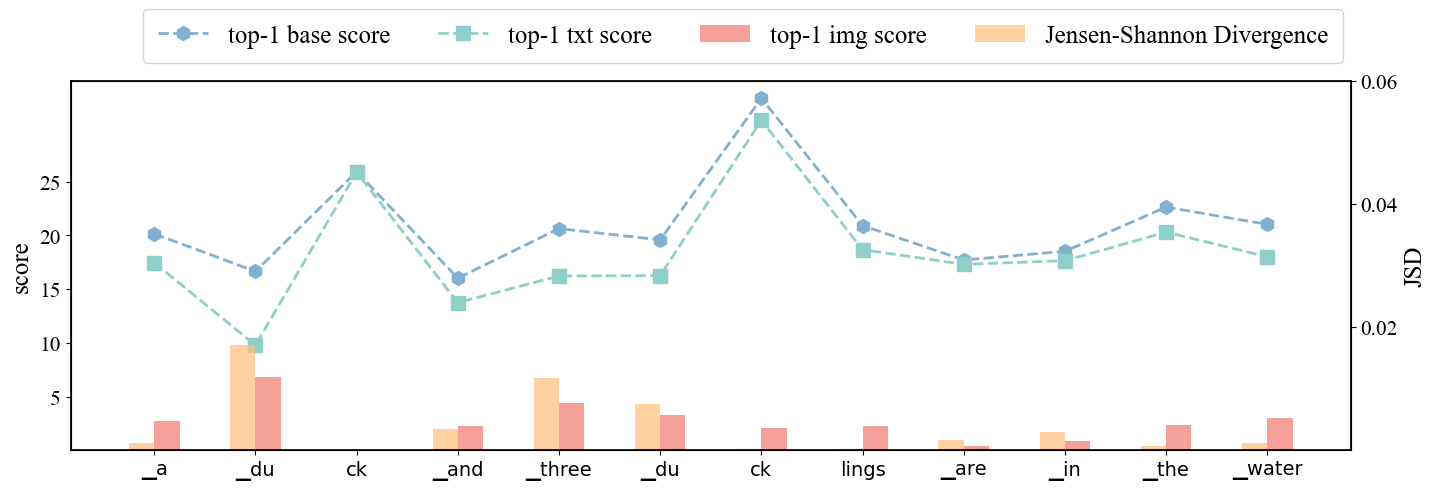

In [3]:
font_s = 18
# font_n = "Times New Roman"
csfont = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=18)
# font_n = "Arial"
font_n = "Helvetica"
line_s = 2.0
border_s = 1.25
bar_width = 0.25
# bar_distance = 0.5

plt.figure(figsize=(22, 5), dpi=1000)
fig, ax1 = plt.subplots()
# fig.tight_layout()
plt.subplots_adjust(left=-0.4, right=1.6)

greedy_delta_logits = [greedy_base_logits[i] - greedy_noise_logits[i] for i in range(len(greedy_base_logits))]


# plt.bar([x - 1/2*bar_width for x in list(range(len(tokens)))], delta_logits_topk_mean_list, bar_width,
        # label="top-50 HeadVocab top-10 delta logit", color="#FFBE7A", alpha=0.7)

ax1.bar([x + 1/2*bar_width for x in list(range(len(tokens)))], greedy_delta_logits, bar_width,
        label="top-1 img score", color="#F27970", alpha=0.7)

ax1.plot(list(range(len(tokens))), greedy_base_logits, label="top-1 base score", 
         linewidth=line_s, color="#82B0D2", linestyle='--', marker='h', markersize=10)
ax1.plot(list(range(len(tokens))), greedy_noise_logits, label="top-1 txt score", 
         linewidth=line_s, color="#8ECFC9", linestyle='--', marker='s', markersize=10)

ax2 = ax1.twinx()
ax2.bar([x - 1/2*bar_width for x in list(range(len(tokens)))], jsd_topk_list, bar_width,
        label="Jensen-Shannon Divergence", color="#FFBE7A", alpha=0.7)

ax = plt.gca()
ax.spines["top"].set_linewidth(border_s)
ax.spines["bottom"].set_linewidth(border_s)
ax.spines["left"].set_linewidth(border_s)
ax.spines["right"].set_linewidth(border_s)

ax1.set_xticks(list(range(len(tokens))), tokens, fontsize=font_s-4, fontname=font_n)
# ax1.xaxis.set_tick_params(pad=20)
# ax2.xaxis.set_tick_params(pad=20)

# plt.tick_params(labelsize=15)
ax1.set_yticks([5, 10, 15, 20, 25])

ax2.set_yticks([0.02, 0.04, 0.06])
ax2.set_ylim(bottom=-0.)
# ax2.yticks(fontsize=font_s, fontname=font_n)
ax1.set_ylabel("score", fontsize=font_s, fontname='Times New Roman')
x1_label = ax1.get_yticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
[x1_label_temp.set_fontsize(font_s-2.5) for x1_label_temp in x1_label]
ax2.set_ylabel("JSD", fontsize=font_s, fontname='Times New Roman')
x2_label = ax2.get_yticklabels() 
[x2_label_temp.set_fontname('Times New Roman') for x2_label_temp in x2_label]
[x2_label_temp.set_fontsize(font_s-2.5) for x2_label_temp in x2_label]
# plt.xlabel("greedy decoded tokens", fontsize=font_s, fontname=font_n)
# plt.grid(linewidth=border_s, axis='y',alpha=0.85)
# plt.grid(linewidth=border_s,alpha=0.85)

fig.legend(bbox_to_anchor=(0.22, 0.25, 0.86, .102), loc='upper left',ncol=4, 
           mode="expand", borderaxespad=-13.0, borderpad=0.6, columnspacing=4., fontsize=25, prop=csfont)
